# Спектральный анализ 

In [48]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

## Исходные данные

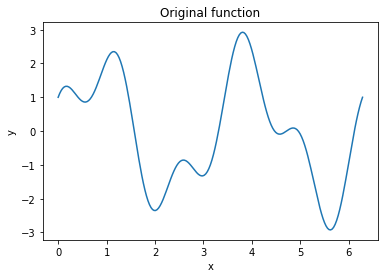

In [85]:
x = np.linspace(0, np.pi * 2, 201)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ 5*np.sin(x * 9)-3*np.cos(x*7) # superposition of harmonics

#x = np.linspace(-10, 10, 101) 
#y = 5*np.exp(-10*x**2)  # example of localized function

#y[x>-1.]=1 # example of step function
#y[x>1.]=0

#print (x/(np.pi * 2))
plt.title ('Original function')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y)

## Прямое и обратное ДПФ

2.664535259100376e-17


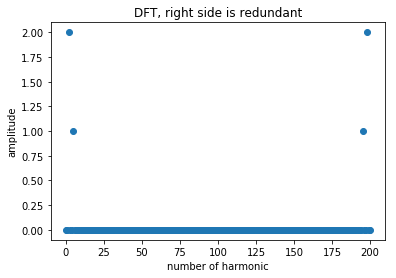

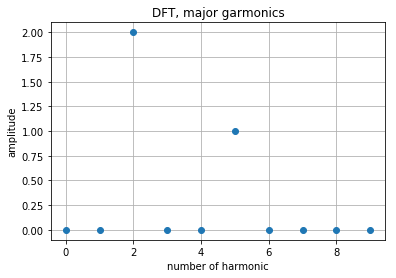

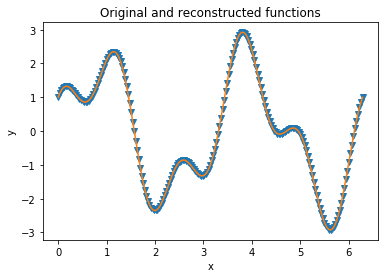

In [86]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (y [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (y[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (y[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5) # amplitude
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])

plt.title ('DFT, right side is redundant')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot (A[0:n], 'o')
plt.figure ()
plt.title ('DFT, major harmonics')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.grid ()
plt.plot (A[0:10], 'o')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, m):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.title ('Original and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x,y, 'v',label='original function' )
plt.plot (x,yf,label='function reconstructed by iDFT')
#plt.legend()

## Быстрое ДПФ (FFT)

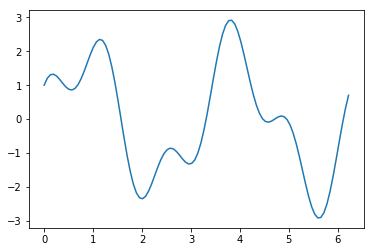

In [74]:
x = np.linspace(0, np.pi * 2, 100, endpoint=False)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

#print (x/(np.pi * 2))

plt.plot(x, y)

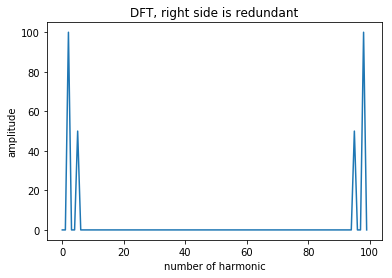

In [81]:
# --------------------------------------------------------------------------------------
#                                                                             Прямое FFT
# --------------------------------------------------------------------------------------

y_fft = fft.fft(y)
plt.title ('DFT, right side is redundant')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot(np.abs(y_fft))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


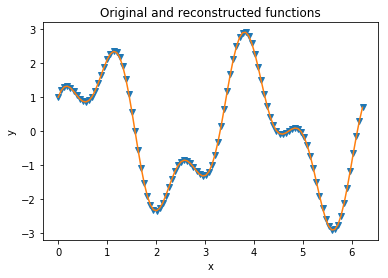

In [80]:
# --------------------------------------------------------------------------------------
#                                                                           обратное FFT
# --------------------------------------------------------------------------------------
from scipy.fftpack import ifft
yf = ifft(y_fft )

plt.figure ()
plt.title ('Original and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x,y, 'v',label='original function' )
plt.plot (x,yf,label='function reconstructed by iDFT')


## Зашумленные данные

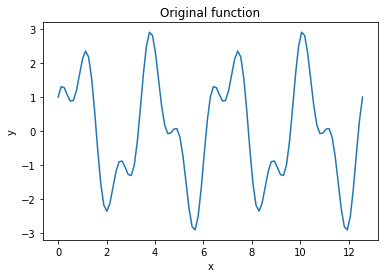

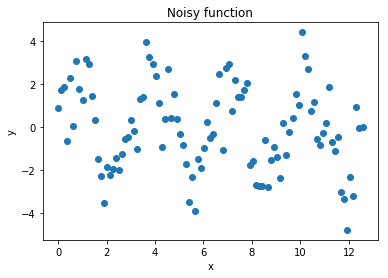

In [89]:
x = np.linspace(0, np.pi * 4, 101)
y = 0. + 2.*np.sin(x * 2) + 1.*np.cos(x * 5 ) # superposition of harmonics 

#y = 0. + 2.*np.sin(x * 2) + 1.*np.cos(x * 5 ) + 1.*x # superposition of harmonics plus linear trend

yd = np.zeros(len(x))


plt.title ('Original function')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y)

Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta

y_av = np.sum(y)/len(x)

plt.figure ()
plt.title ('Noisy function')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x, yd, 'o')

-0.043406900894862266


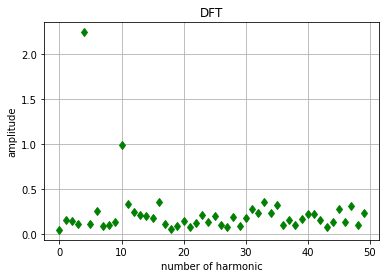

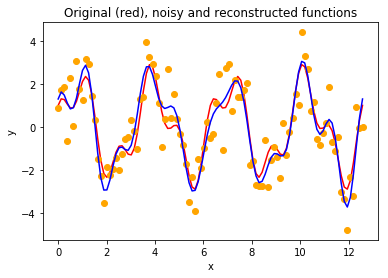

In [97]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (yd [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (yd[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (yd[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5)
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])

plt.grid ()
plt.title ('DFT')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot (A[0:int(n/2)], 'd', color='g')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, int(m/4)):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.title ('Original (red), noisy and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x, y, 'r')
plt.plot (x, yd, 'o', color = 'orange')
plt.plot (x,yf, '-', color='b')

### Стандартный подход к разложению 
Гибридный базис для выделения тренда и осциллирующих компонент

In [56]:
def BasicFunctionsFourie (m, L, x):
    
    # m - number of harmonics
    # L - main period
    # x - array of data points
    
    n = len(x)
     
    k=1 # if k=1 we have pure DFT
    
    PhiFunArray = np.zeros ((len(x), 2 * m+k)) # Matrix of basic functions
    
    PhiFunArray [:,0] = 1  
    PhiFunArray [:,1] = x # Linear part, applied if k=2
         
    for j in range (1, m+1):
        PhiFunArray [:,2*j+(k-1)-1] = np.cos(2*np.pi*j/L*x)
        PhiFunArray [:,2*j+(k-1)] = np.sin(2*np.pi*j/L*x)
    
    return PhiFunArray

coefficients
[-4.34069009e-02 -3.35438857e-03  1.54118670e-01 -8.24520717e-02
 -1.17629417e-01  1.03321404e-01 -2.04830657e-02 -1.88122658e-03
  2.24003005e+00  7.76060148e-02  7.83522372e-02 -1.90220479e-01
  1.65345990e-01 -6.04053209e-02 -6.76042497e-02  9.44644195e-02
  3.35249450e-02  9.67788799e-02  8.75556192e-02  9.80996996e-01
 -1.26518110e-01  3.28483355e-01  1.58133751e-02]


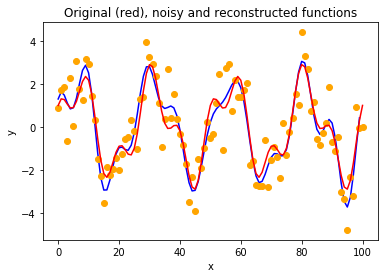

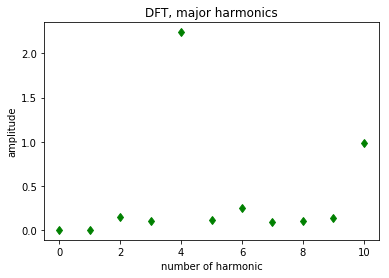

In [96]:
n = len(x)

x1 = x[:n-1] # taking all data points except the last one
y1 = yd[:n-1]

mmax = int(n/2)

m = int(mmax/4)-1 # number of harmonics taking into account 

Phi = BasicFunctionsFourie (m, L, x1) 

#print (Phi)
    
PhiT = Phi.T
G = PhiT @ Phi 
z = PhiT @ y1
a = np.linalg.solve(G, z) # getting coefficients of decomposition

print ('coefficients')
print (a)

ma = len (a)

k = ma-m*2 # number of non garmonic terms 

A = np.zeros (m)

for j in range (1, m-1):
    A[j+1] = (a[2*j+k]**2+a[2*j+k+1]**2)**0.5 # calculating amplitudes
    
w = Phi@a # inverse transformation

plt.title ('Original (red), noisy and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')    
plt.plot(w, 'b')
plt.plot(yd, 'o', color='orange')
plt.plot(y, '-', color='r')

plt.figure ()

plt.title ('DFT, major harmonics')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot (A, 'd', color='green') 